<a href="https://colab.research.google.com/github/josejulianhidayat/Data_Mining/blob/main/ExploratoryDataAnalysis_StudiKasusTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA ( Exploratory Data Analysis )
**Pertemuan ke-4 Mata Kuliah Data Mining**

Nama : Jose Julian Hidayat

NIM  : 312210695

Kelas : TI.22.C8

# Loading & Preprocessing Data

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Hapus kolom yang unik nilainya
df.drop(columns=['PassengerId'], inplace=True)

In [3]:
#Cek duplikasi data
df.duplicated().sum()

0

In [4]:
#Jika ada data dupilkasi,maka dihapus
df.drop_duplicates(inplace=True)

In [5]:
#Cek Data yang missing value/kosong/null/NA/NaN
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [6]:
#Cek baris yang nilai Age nya kosong/NaN
df[df.Age.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
#Jika missing value pada kolom lebih besar  50% dari data, maka hapus
df.drop(columns=['Cabin'], inplace=True)

In [9]:
#Isi data kosong dengan nilai median data Age
df["Age"] = df["Age"].fillna(df["Age"].median())

In [10]:
#Cek baris yang nilai Embarked nya kosong/NaN
df[df.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [11]:
#Cek nilai yang sering muncul pada kolom Embarked
df.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [13]:
#Isi data kosong dengan nilai 'S' data Embarked
df["Embarked"] = df["Embarked"].fillna("S")

In [14]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


# Data Decriptions

In [15]:
## Statistic descriptif
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Selecting & Filtering Data

In [17]:
#Memilih 1 kolom( menghasilkan data series)
name=df['Name']    #atau dengan df.Name
name

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


**Menampilkan data Survived. simpan dalam variabel y.**

In [18]:
y = df["Survived"]

In [19]:
print(y.head())  # Menampilkan 5 baris pertama


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [20]:
#Memilih 2 atau lebih kolom
bio=df[['Name','Sex']]
bio

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


**Tampilkan data Name, Age, Sex, SibSp. simpan dalam variabel X**

In [21]:
X = df[["Name", "Age", "Sex", "SibSp"]]

In [22]:
print(X.head())  # Menampilkan 5 baris pertama


                                                Name   Age     Sex  SibSp
0                            Braund, Mr. Owen Harris  22.0    male      1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female      1
2                             Heikkinen, Miss. Laina  26.0  female      0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  female      1
4                           Allen, Mr. William Henry  35.0    male      0


In [23]:
#Menampilkan data baris, menggunakan loc
df.loc[0:2] #Menampilkan baris index 0 sd 2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


# Tampilkan data dari baris ke 10 sd 15

In [25]:
from IPython.display import display

# Menampilkan tabel dengan grid dalam Jupyter Notebook
display(df.iloc[10:16].style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.700000,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.550000,S
12,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.050000,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.275000,S
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.854200,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.000000,S


In [26]:
df.loc[1:3,'Name':'Age'] #Menampilkan baris index 1 sd 3 dengan kolom Name sd Age

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0


**Tampilkan data dari baris ke 10 sd 15 dengan kolom Name s.d Fare**

In [28]:
from IPython.display import display

# Menampilkan data dari baris ke-10 sampai ke-15 dengan kolom dari "Name" sampai "Fare"
df_subset = df.iloc[10:16, df.columns.get_loc("Name"):df.columns.get_loc("Fare") + 1]

# Menampilkan dengan style grid
styled_df = df_subset.style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
)

# Tampilkan tabel dengan style grid
display(styled_df)

,Name,Sex,Age,SibSp,Parch,Ticket,Fare
10,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.700000
11,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.550000
12,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.050000
13,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.275000
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.854200
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.000000


In [30]:
from IPython.display import display

# Menampilkan data dari index 1 sampai 4 dan kolom dari "Name" sampai "Age"
df_subset = df.iloc[1:5, df.columns.get_loc("Name"):df.columns.get_loc("Age") + 1]

# Menampilkan dengan style grid
styled_df = df_subset.style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
)

# Tampilkan tabel dengan style grid
display(styled_df)


,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000
2,"Heikkinen, Miss. Laina",female,26.000000
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000
4,"Allen, Mr. William Henry",male,35.000000


**Tampilkan data dari baris ke 10 sd 15, hanya untuk kolom Age,Sex,Fare**

In [31]:
from IPython.display import display

# Menampilkan data dari baris ke-10 sampai ke-15 untuk kolom Age, Sex, dan Fare
df_subset = df.iloc[10:16][["Age", "Sex", "Fare"]]

# Menampilkan dengan style grid
styled_df = df_subset.style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
)

# Tampilkan tabel dengan style grid
display(styled_df)


,Age,Sex,Fare
10,4.000000,female,16.700000
11,58.000000,female,26.550000
12,20.000000,male,8.050000
13,39.000000,male,31.275000
14,14.000000,female,7.854200
15,55.000000,female,16.000000


# Filtering Data

In [32]:
#Menampilkan data dengan kode keberangkatan (Embarked) adalah 'Q'
df[df['Embarked']=='Q']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q
32,1,3,"Glynn, Miss. Mary Agatha",female,28.0,0,0,335677,7.7500,Q
...,...,...,...,...,...,...,...,...,...,...
790,0,3,"Keane, Mr. Andrew ""Andy""",male,28.0,0,0,12460,7.7500,Q
825,0,3,"Flynn, Mr. John",male,28.0,0,0,368323,6.9500,Q
828,1,3,"McCormack, Mr. Thomas Joseph",male,28.0,0,0,367228,7.7500,Q
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


**Tampilkan data penumpang yang berumur lebih dari 40 tahun**

In [33]:
from IPython.display import display

# Memfilter penumpang dengan usia lebih dari 40 tahun
df_filtered = df[df["Age"] > 40]

# Menampilkan dengan style grid
styled_df = df_filtered.style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
)

# Tampilkan tabel dengan style grid
display(styled_df)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.550000,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.000000,S
33,0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.500000,S
35,0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.000000,S
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.729200,C
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.979200,C
62,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.475000,S
92,0,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.175000,S
94,0,3,"Coxon, Mr. Daniel",male,59.000000,0,0,364500,7.250000,S


In [34]:
#Menampilkan data kode Embarked 'C' dan Sex adalah 'male'
df[(df['Embarked']=='C') & (df['Sex']=='male') ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
26,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,C
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
36,1,3,"Mamee, Mr. Hanna",male,28.0,0,0,2677,7.2292,C
42,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,C
...,...,...,...,...,...,...,...,...,...,...
839,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,11774,29.7000,C
843,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,C
847,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,C
859,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,C


**Tampilkan data penumpang yang berumur lebih dari 40 tahun dan status Sex adalah 'female'**

In [35]:
from IPython.display import display

# Memfilter penumpang dengan usia > 40 dan jenis kelamin 'female'
df_filtered = df[(df["Age"] > 40) & (df["Sex"] == "female")]

# Menampilkan dengan style grid
styled_df = df_filtered.style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
)

# Tampilkan tabel dengan style grid
display(styled_df)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.550000,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.000000,S
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.729200,C
132,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.000000,1,0,A/5. 3337,14.500000,S
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.000000,1,4,347088,27.900000,S
177,0,1,"Isham, Miss. Ann Elizabeth",female,50.000000,0,0,PC 17595,28.712500,C
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.000000,0,0,PC 17610,27.720800,C
195,1,1,"Lurette, Miss. Elise",female,58.000000,0,0,PC 17569,146.520800,C
254,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.000000,0,2,370129,20.212500,S
259,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.000000,0,1,230433,26.000000,S


In [36]:
#Menampilkan data Name dan Sex hanya untuk Sex='male'
df[df['Sex']=='male'][['Name','Sex']]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
...,...,...
883,"Banfield, Mr. Frederick James",male
884,"Sutehall, Mr. Henry Jr",male
886,"Montvila, Rev. Juozas",male
889,"Behr, Mr. Karl Howell",male


**Tampilkan data Name,Age yang berumur lebih dari 40 tahun**

In [37]:
from IPython.display import display

# Memfilter penumpang dengan usia > 40 dan memilih kolom Name dan Age
df_filtered = df[df["Age"] > 40][["Name", "Age"]]

# Menampilkan dengan style grid
styled_df = df_filtered.style.set_table_styles(
    [{'selector': 'th, td', 'props': 'border: 1px solid black;'}]
)

# Tampilkan tabel dengan style grid
display(styled_df)


,Name,Age
6,"McCarthy, Mr. Timothy J",54.000000
11,"Bonnell, Miss. Elizabeth",58.000000
15,"Hewlett, Mrs. (Mary D Kingcome)",55.000000
33,"Wheadon, Mr. Edward H",66.000000
35,"Holverson, Mr. Alexander Oskar",42.000000
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.000000
54,"Ostby, Mr. Engelhart Cornelius",65.000000
62,"Harris, Mr. Henry Birkhardt",45.000000
92,"Chaffee, Mr. Herbert Fuller",46.000000
94,"Coxon, Mr. Daniel",59.000000


# Chart

**Splitting numerical and categorical data type**

In [38]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [39]:
numerical_cols=['Age','SibSp','Parch','Fare']
categorical_cols=['Pclass','Sex','Embarked']

In [40]:
#import library seaborn dan matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

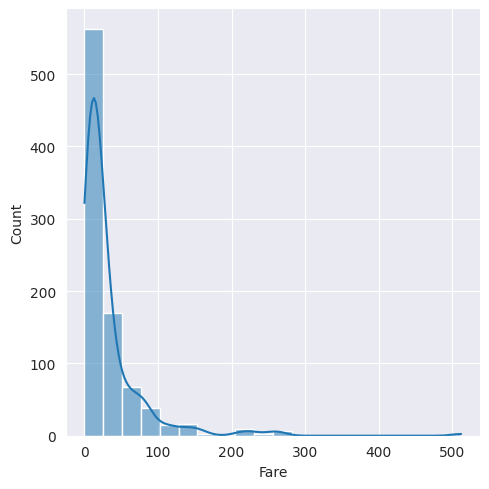

In [41]:
#Menampilkan distribusi data fare
sns.displot(data= df, x= 'Fare',bins=20, kde=True)

**Tampilkan grafik data Age dan jelaskan informasi yang ada di grafik**

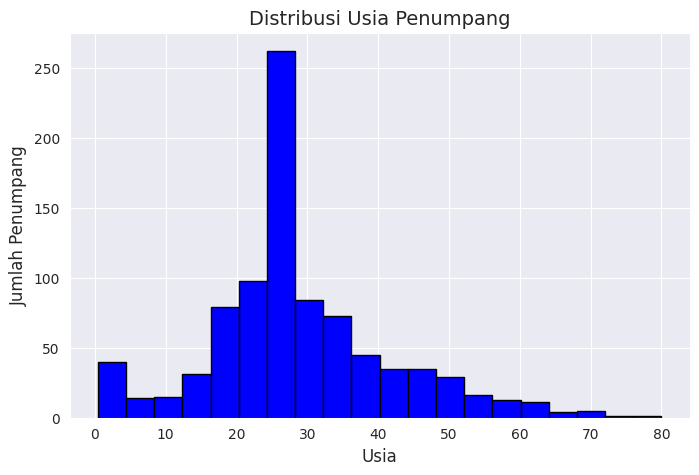

In [43]:
# Membuat histogram untuk kolom Age
plt.figure(figsize=(8, 5))
plt.hist(df["Age"].dropna(), bins=20, edgecolor="black", color="Blue")

# Menambahkan judul dan label
plt.title("Distribusi Usia Penumpang", fontsize=14)
plt.xlabel("Usia", fontsize=12)
plt.ylabel("Jumlah Penumpang", fontsize=12)

# Menampilkan chart
plt.show()

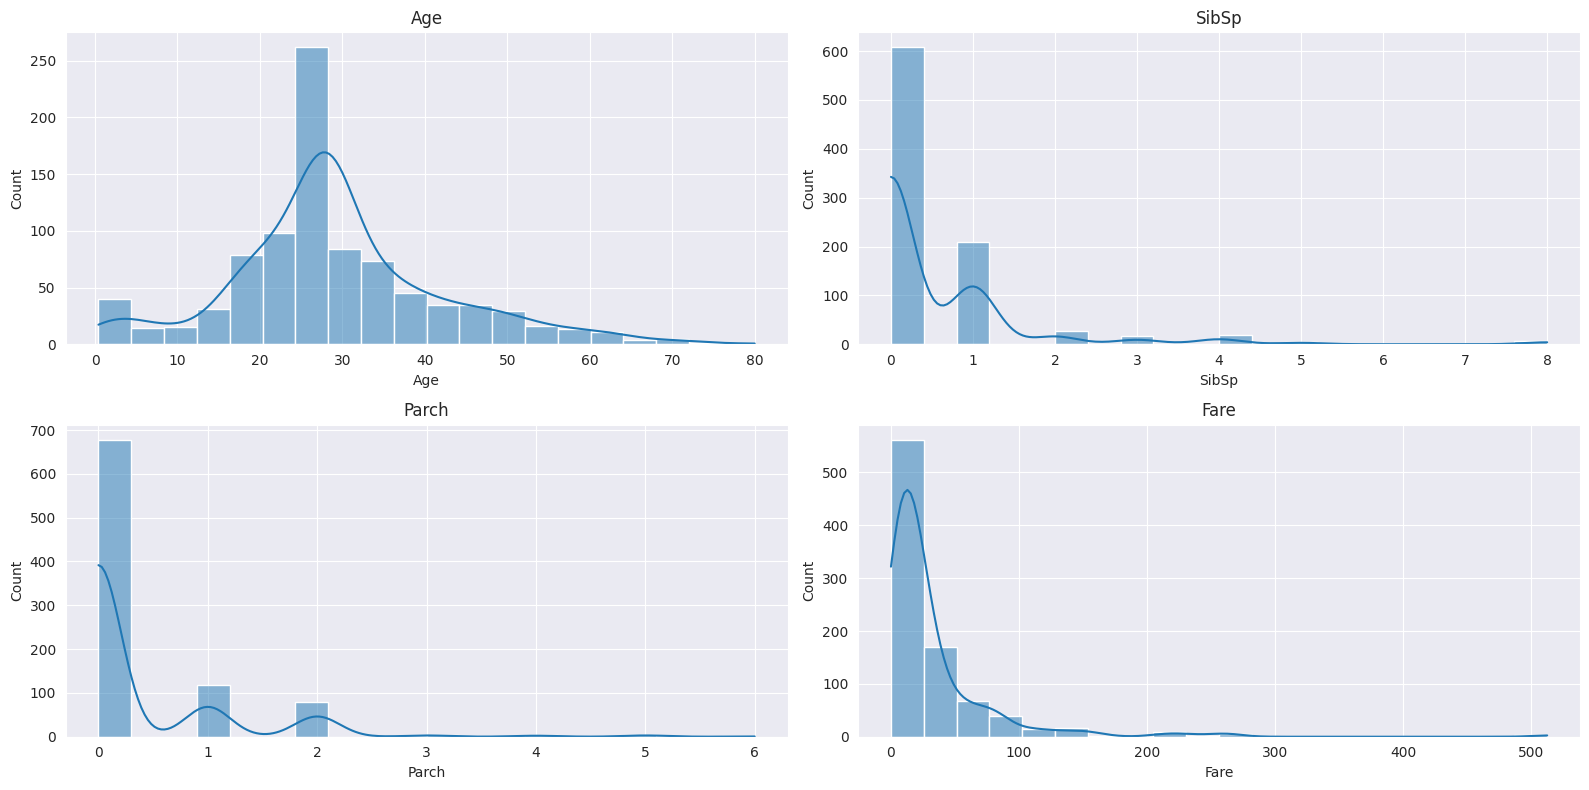

In [44]:
# Membuat chart semua data numeric
fig,axs=plt.subplots(2,2, figsize=(16,8))
for col,ax in zip(numerical_cols,axs.flatten()):
  ax.set_title(col)
  sns.histplot(data= df, x= col,bins=20,kde=True, ax=ax)

plt.tight_layout()

**Categorical data type chart**

<Axes: xlabel='Sex', ylabel='count'>

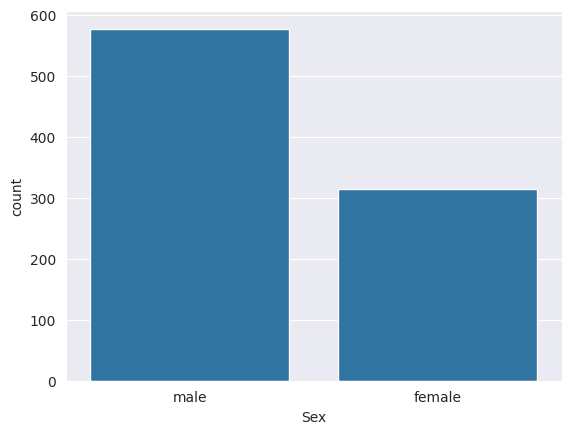

In [45]:
#Menampilkan grafik data Sex
sns.countplot(data= df, x= 'Sex')

**Tampilkan grafik data Embarked dan jelaskan informasi yang ada di grafik**

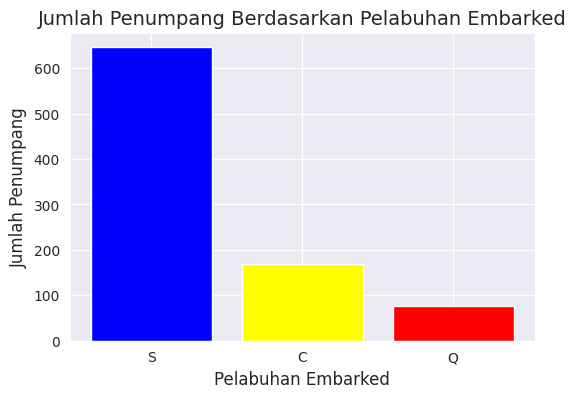

In [47]:
import matplotlib.pyplot as plt

# Menghitung jumlah penumpang berdasarkan Embarked
embarked_counts = df["Embarked"].value_counts()

# Membuat bar chart
plt.figure(figsize=(6, 4))
plt.bar(embarked_counts.index, embarked_counts.values, color=['blue', 'yellow', 'red'])

# Menambahkan judul dan label
plt.title("Jumlah Penumpang Berdasarkan Pelabuhan Embarked", fontsize=14)
plt.xlabel("Pelabuhan Embarked", fontsize=12)
plt.ylabel("Jumlah Penumpang", fontsize=12)

# Menampilkan grafik
plt.show()


**Tampilkan grafik untuk semua data kategori dan jelaskan informasi yang ada di grafik**

In [48]:
# Menentukan kolom kategori yang ada dalam DataFrame
categorical_columns = ["Sex", "Embarked", "Pclass", "Survived"]

In [49]:
# Filter hanya kolom yang benar-benar ada dalam DataFrame
existing_columns = [col for col in categorical_columns if col in df.columns]

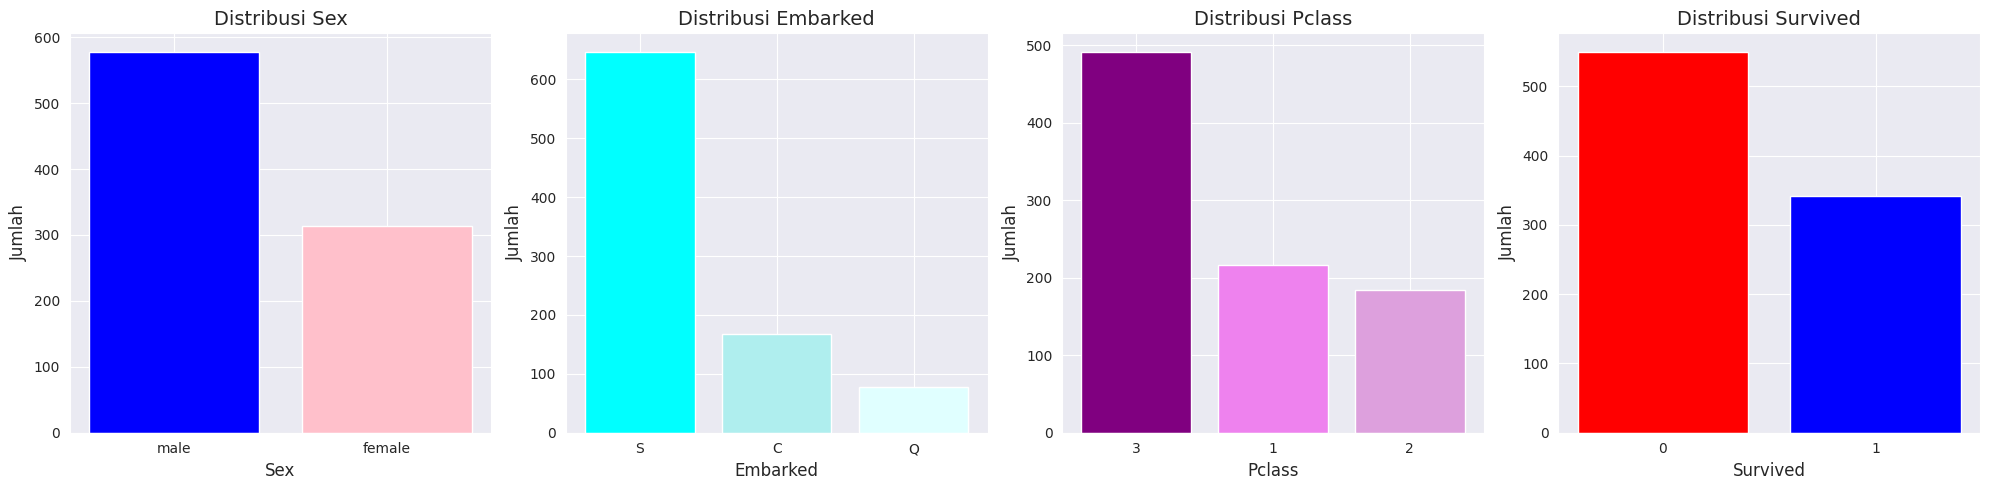

In [54]:
# Menentukan jumlah subplot berdasarkan jumlah kategori yang tersedia
fig, axes = plt.subplots(1, len(existing_columns), figsize=(5 * len(existing_columns), 5))

# Jika hanya ada satu kategori, ubah axes menjadi list untuk iterasi
if len(existing_columns) == 1:
    axes = [axes]

# Warna spesifik untuk kategori
color_mapping = {
    "Sex": {"male": "blue", "female": "pink"},
    "Embarked": {"S": "cyan", "C": "paleturquoise", "Q": "lightcyan"},
    "Pclass": {1: "violet", 2: "plum", 3: "purple"},
    "Survived": {0: "red", 1: "blue"}
}

# Membuat grafik batang untuk setiap kategori yang ada
for ax, col in zip(axes, existing_columns):
    counts = df[col].value_counts()

    # Menentukan warna sesuai dengan mapping
    colors = [color_mapping[col].get(category, "gray") for category in counts.index]

    ax.bar(counts.index.astype(str), counts.values, color=colors)
    ax.set_title(f"Distribusi {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Jumlah", fontsize=12)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()